<a href="https://colab.research.google.com/github/Untick/Usedesk/blob/main/Vishnyakov%20Dmitry/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # массивы
import pandas as pd # таблицы
from tensorflow.keras.models import Sequential, Model # последовательная модель НС
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # основные слои
from tensorflow.keras.layers import Activation # слой задания активационной функции
from tensorflow.keras import utils # утилиты предобработки данных
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split # разделение на обучающую и проверочную\тестовую выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt # рисование графиков
%matplotlib inline

In [ ]:
df1 = pd.read_excel("drive/MyDrive/Копия Витрина_Юздеск_2.xlsx")

In [ ]:
df0 = df1.copy()
#df0.head()
print(df1.shape)
df1.head()

(11779, 55)


,#NAME?,comp_id_new,месяц_desc,дата,рейтинг,всего,есть ответ,выполнен,закрыт,nps,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,#NAME?,1,1,2023-06-01,2,3709,3442,578,2466,1231,...,0,0,0,0,2,0,0,13,1,4
1,#NAME?,1,2,2023-05-01,2,5573,5301,36,4715,2004,...,0,0,0,0,5,0,0,13,1,4
2,#NAME?,1,3,2023-04-01,2,6138,5983,4,5496,2242,...,0,0,0,0,1,0,0,13,1,4
3,#NAME?,1,4,2023-03-01,2,7834,7664,1,7094,2851,...,0,0,0,0,6,0,0,13,1,4
4,#NAME?,1,5,2023-02-01,2,7344,7252,1,6657,2686,...,0,0,0,0,2,0,0,13,1,4


In [ ]:
df_corr = df1.corr()
df_corr.head()

<ipython-input-4-116edd41f2f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df1.corr()


,comp_id_new,месяц_desc,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,telephony,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
comp_id_new,1.000000,-0.406041,0.050274,-0.097537,-0.060921,-0.104099,-0.071961,-0.058255,-0.084247,-0.045335,...,-0.011743,-0.010986,NaN,-0.026802,-0.002016,-0.024166,-0.069695,-0.079223,-0.157896,-0.100644
месяц_desc,-0.406041,1.000000,0.062635,0.009857,-0.041746,0.026919,-0.018879,-0.064097,0.040836,0.017945,...,0.023088,0.021810,NaN,-0.015304,-0.012759,-0.025778,0.077194,0.100492,0.100082,0.113892
рейтинг,0.050274,0.062635,1.000000,0.079701,0.140555,0.021347,0.086551,0.079945,0.077043,0.059554,...,-0.013358,-0.004228,NaN,0.030809,0.054891,0.035014,0.035195,0.213727,0.085285,0.082856
всего,-0.097537,0.009857,0.079701,1.000000,0.769969,0.602674,0.836197,0.454097,0.647065,0.530440,...,-0.001782,-0.002966,NaN,0.030045,0.086613,0.025897,0.297219,0.270564,0.328473,0.396229
есть ответ,-0.060921,-0.041746,0.140555,0.769969,1.000000,0.496056,0.684775,0.587044,0.474847,0.429777,...,-0.003362,-0.003195,NaN,0.056817,0.130618,0.055578,0.253887,0.382440,0.210911,0.243454


In [ ]:
df_param = df_corr[(df_corr.рейтинг > 0.07) & (df_corr.рейтинг < 1)]
display(df_param)
print(df_param.shape)

,comp_id_new,месяц_desc,рейтинг,всего,есть ответ,выполнен,закрыт,nps,email,telephony,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
всего,-0.097537,0.009857,0.079701,1.000000,0.769969,0.602674,0.836197,0.454097,0.647065,0.530440,...,-0.001782,-0.002966,NaN,0.030045,0.086613,0.025897,0.297219,0.270564,0.328473,0.396229
есть ответ,-0.060921,-0.041746,0.140555,0.769969,1.000000,0.496056,0.684775,0.587044,0.474847,0.429777,...,-0.003362,-0.003195,NaN,0.056817,0.130618,0.055578,0.253887,0.382440,0.210911,0.243454
закрыт,-0.071961,-0.018879,0.086551,0.836197,0.684775,0.297519,1.000000,0.423528,0.598727,0.371628,...,-0.002561,-0.002635,NaN,0.037384,0.079904,0.040027,0.189644,0.357761,0.276997,0.353700
nps,-0.058255,-0.064097,0.079945,0.454097,0.587044,0.414694,0.423528,1.000000,0.271909,0.132881,...,0.002329,-0.002300,NaN,0.023594,0.084995,0.072000,0.081680,0.280239,0.067559,0.095244
email,-0.084247,0.040836,0.077043,0.647065,0.474847,0.377139,0.598727,0.271909,1.000000,0.161384,...,0.000450,-0.002340,NaN,0.024301,0.107539,0.014582,0.216982,0.179535,0.234168,0.273238
usedesk_chat,-0.047951,-0.051126,0.071765,0.458182,0.606655,0.424921,0.421476,0.574059,0.112814,0.084110,...,-0.001985,-0.001985,NaN,0.031202,0.046694,0.113223,0.086703,0.284466,0.080375,0.081238
telegram,0.015514,-0.077111,0.075284,0.256106,0.341411,0.080090,0.331612,0.359827,0.030877,0.030869,...,-0.001157,-0.001157,NaN,0.013344,0.008959,0.011948,-0.003815,0.200948,-0.012502,-0.018945
whatsapp,-0.009958,-0.065393,0.071776,0.144780,0.246364,0.018591,0.208982,0.156668,0.023453,0.064639,...,-0.001495,-0.001495,NaN,0.038999,-0.002442,-0.009583,0.013345,0.130413,0.015182,0.010344
fb_instagram,0.036576,-0.046844,0.071924,0.099247,0.065340,0.006175,0.123679,0.005510,0.008305,0.002031,...,-0.000929,-0.000929,NaN,0.041424,0.048013,0.036306,0.020078,-0.003415,-0.018166,-0.009540
question,-0.099745,0.010529,0.096774,0.966319,0.737998,0.507103,0.818635,0.385626,0.687023,0.566644,...,-0.001665,-0.002913,NaN,0.033840,0.083257,0.029445,0.314784,0.273060,0.340527,0.405769


(15, 53)


In [ ]:
reit_col = df_param['рейтинг']
list_param = reit_col.index.to_list()
print(reit_col.index)
print(list_param)
print(reit_col.count())

Index(['всего', 'есть ответ', 'закрыт', 'nps', 'email', 'usedesk_chat',
       'telegram', 'whatsapp', 'fb_instagram', 'question', 'medium',
       'правила_dist', 'licens', 'бз', 'бз_ст'],
      dtype='object')
['всего', 'есть ответ', 'закрыт', 'nps', 'email', 'usedesk_chat', 'telegram', 'whatsapp', 'fb_instagram', 'question', 'medium', 'правила_dist', 'licens', 'бз', 'бз_ст']
15


In [ ]:
df1.loc[df1.рейтинг>0, 'рейтинг'] = 1

In [ ]:
df1.head()

,#NAME?,comp_id_new,месяц_desc,дата,рейтинг,всего,есть ответ,выполнен,закрыт,nps,...,u-task,u_problem,u_incident,u_low,u_medium,u_urgent,u_extreme,licens,бз,бз_ст
0,#NAME?,1,1,2023-06-01,1,3709,3442,578,2466,1231,...,0,0,0,0,2,0,0,13,1,4
1,#NAME?,1,2,2023-05-01,1,5573,5301,36,4715,2004,...,0,0,0,0,5,0,0,13,1,4
2,#NAME?,1,3,2023-04-01,1,6138,5983,4,5496,2242,...,0,0,0,0,1,0,0,13,1,4
3,#NAME?,1,4,2023-03-01,1,7834,7664,1,7094,2851,...,0,0,0,0,6,0,0,13,1,4
4,#NAME?,1,5,2023-02-01,1,7344,7252,1,6657,2686,...,0,0,0,0,2,0,0,13,1,4


In [ ]:
#print(df1.shape)
#print(df1.size)
#print(df1.info())
#print(df1.describe())
#print(df1.nunique())

In [ ]:
n = 0
for n in [list_param]:
    df_model = (df1[n])
    print(df_model.shape)
    print(df_model.head())

(11779, 15)
   всего  есть ответ  закрыт   nps  email  usedesk_chat  telegram  whatsapp  \
0   3709        3442    2466  1231   1317           779       737       778   
1   5573        5301    4715  2004   2008          1248      1125      1089   
2   6138        5983    5496  2242   1991          1440      1222      1378   
3   7834        7664    7094  2851   2519          1856      1559      1765   
4   7344        7252    6657  2686   2377          1764      1552      1596   

   fb_instagram  question  medium  правила_dist  licens  бз  бз_ст  
0            70      3376    2568            66      13   1      4  
1            66      5107    3735            62      13   1      4  
2            78      5611    4114            64      13   1      4  
3           106      7191    5313            62      13   1      4  
4            25      6724    4894            60      13   1      4  


In [ ]:
df_model.max()
#df_model.values[2].max()

всего           894142
есть ответ      348032
закрыт          838365
nps             100978
email           892563
usedesk_chat    136569
telegram        111091
whatsapp        103838
fb_instagram     62168
question        894142
medium          894142
правила_dist       689
licens             180
бз                  30
бз_ст             2673
dtype: int64

In [ ]:
x_data = []

for i in range(len(df_model.values)):        # Вывод значения каждого столбца
    y = df_model.values[i].max()
    x = df_model.values[i] / y
    x_data.append(x)
x_data = np.array(x_data)
print(x_data.shape)
n = 0
for i in range(len(df_model.values[n])):
    print('{:>2}  {}'.format(i, df_model.values[n][i]))
print(x_data[0,:])

(11779, 15)
 0  3709
 1  3442
 2  2466
 3  1231
 4  1317
 5  779
 6  737
 7  778
 8  70
 9  3376
10  2568
11  66
12  13
13  1
14  4
[1.00000000e+00 9.28012941e-01 6.64869237e-01 3.31895390e-01
 3.55082232e-01 2.10029658e-01 1.98705851e-01 2.09760043e-01
 1.88730116e-02 9.10218388e-01 6.92369911e-01 1.77945538e-02
 3.50498787e-03 2.69614451e-04 1.07845781e-03]


In [ ]:
x_data = np.array(x_data)
y_data = np.array(df1['рейтинг'])
print(x_data[0,:])
print(y_data[0])

[1.00000000e+00 9.28012941e-01 6.64869237e-01 3.31895390e-01
 3.55082232e-01 2.10029658e-01 1.98705851e-01 2.09760043e-01
 1.88730116e-02 9.10218388e-01 6.92369911e-01 1.77945538e-02
 3.50498787e-03 2.69614451e-04 1.07845781e-03]
1


In [ ]:
#Функция отрисовки графика
def plot_hst(history):
    plt.plot(history.history['mae'],
            label = 'Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(history.history['val_mae'],
             label = 'Средняя абсолютная ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

Epoch 1/15
189/189 [==============================] - 2s 6ms/step - loss: 0.2367 - mae: 0.4826 - val_loss: 0.2150 - val_mae: 0.4619
Epoch 2/15
189/189 [==============================] - 1s 5ms/step - loss: 0.2143 - mae: 0.4523 - val_loss: 0.1705 - val_mae: 0.4042
Epoch 3/15
189/189 [==============================] - 1s 5ms/step - loss: 0.2002 - mae: 0.4280 - val_loss: 0.1451 - val_mae: 0.3620
Epoch 4/15
189/189 [==============================] - 1s 5ms/step - loss: 0.1922 - mae: 0.4105 - val_loss: 0.1328 - val_mae: 0.3378
Epoch 5/15
189/189 [==============================] - 1s 5ms/step - loss: 0.1862 - mae: 0.3962 - val_loss: 0.1257 - val_mae: 0.3228
Epoch 6/15
189/189 [==============================] - 1s 4ms/step - loss: 0.1820 - mae: 0.3857 - val_loss: 0.1217 - val_mae: 0.3134
Epoch 7/15
189/189 [==============================] - 1s 4ms/step - loss: 0.1793 - mae: 0.3773 - val_loss: 0.1197 - val_mae: 0.3075
Epoch 8/15
189/189 [==============================] - 1s 4ms/step - loss: 0.

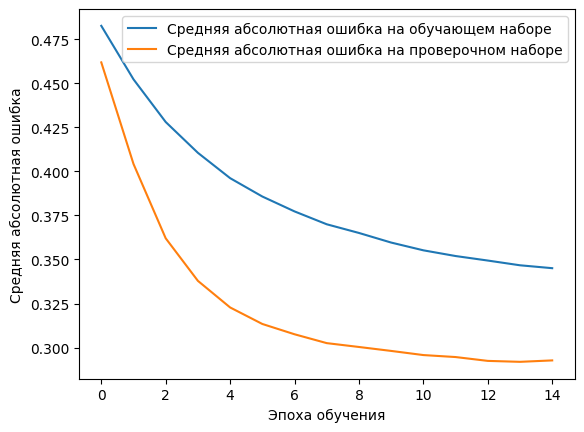

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_dim=x_data.shape[1]))
model. add(Dense(200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.1))
model. add(Dense(100, activation='relu'))
#model.add(Dropout(0.1))
model. add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model.fit(x_data, y_data, epochs=15, batch_size=50, validation_split=0.2, verbose=1)

plot_hst(history)

In [ ]:
pred = model.predict(x_data)

print((abs(pred - y_data)).mean())         # Расчет вручную
print(mean_absolute_error(pred, y_data))   # Расчет с помощью готовой функции

369/369 [==============================] - 1s 2ms/step
0.344825974397201
0.33190408708694197


In [ ]:
def eval_net(model, x_train, y_train, n = 1000):
    pred = model.predict(x_train)
    print('Средняя абсолютная ошибка', mean_absolute_error(pred, y_train), '\n')
    for i in range(n):
        print('Реальное значение: {:6.2f} Предсказанное значение: {:6.2f} Разница: {:6.2f}'.format(y_train[i],
                                                                                                   pred[i, 0],
                                                                                                   abs(y_train[i] - pred[i, 0])))

In [ ]:
eval_net(model, x_data, y_data)

369/369 [==============================] - 1s 2ms/step
Средняя абсолютная ошибка 0.33190408708694197 

Реальное значение:   1.00 Предсказанное значение:   0.74 Разница:   0.26
Реальное значение:   1.00 Предсказанное значение:   0.77 Разница:   0.23
Реальное значение:   1.00 Предсказанное значение:   0.78 Разница:   0.22
Реальное значение:   1.00 Предсказанное значение:   0.79 Разница:   0.21
Реальное значение:   1.00 Предсказанное значение:   0.79 Разница:   0.21
Реальное значение:   1.00 Предсказанное значение:   0.79 Разница:   0.21
Реальное значение:   1.00 Предсказанное значение:   0.80 Разница:   0.20
Реальное значение:   1.00 Предсказанное значение:   0.80 Разница:   0.20
Реальное значение:   1.00 Предсказанное значение:   0.79 Разница:   0.21
Реальное значение:   1.00 Предсказанное значение:   0.79 Разница:   0.21
Реальное значение:   1.00 Предсказанное значение:   0.80 Разница:   0.20
Реальное значение:   1.00 Предсказанное значение:   0.80 Разница:   0.20
Реальное значение:   